In [3]:
from keras.applications import EfficientNetB0
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [4]:
train_data = np.load('CIFAKE_Train.npz')
test_data = np.load('CIFAKE_Test.npz')

In [5]:
x_train = train_data['images']
y_train = train_data['labels']

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
x_test = test_data['images']
y_test = test_data['labels']

In [8]:
label_names = train_data['label_names']

In [9]:
def PlotImages(ix_start,num_img,rows,cols,images,labels,label_names,color=True):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        if color:
            plt.imshow(images[ix_start+i])
        else:
            plt.imshow(np.squeeze(images[ix_start+i]),cmap='Greys')
        plt.title(label_names[labels[ix_start+i]])

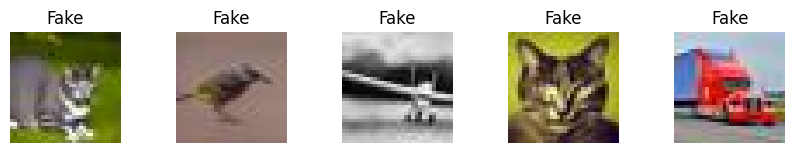

In [10]:
PlotImages(0,5,1,5,x_train,y_train,label_names)

In [11]:
efficient_net = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

16705208/16705208 [==============================] - 1s 0us/step


In [12]:
x = efficient_net.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
Ph = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=efficient_net.input, outputs=Ph)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))

Epoch 1/10
2500/2500 [==============================] - 147s 41ms/step - loss: 0.2039 - accuracy: 0.9195 - val_loss: 0.1082 - val_accuracy: 0.9606
Epoch 2/10
2500/2500 [==============================] - 99s 40ms/step - loss: 0.1211 - accuracy: 0.9550 - val_loss: 0.1267 - val_accuracy: 0.9624
Epoch 3/10
2500/2500 [==============================] - 100s 40ms/step - loss: 0.0979 - accuracy: 0.9635 - val_loss: 0.1061 - val_accuracy: 0.9651
Epoch 4/10
2500/2500 [==============================] - 107s 43ms/step - loss: 0.0848 - accuracy: 0.9690 - val_loss: 0.0864 - val_accuracy: 0.9675
Epoch 5/10
2500/2500 [==============================] - 100s 40ms/step - loss: 0.0746 - accuracy: 0.9723 - val_loss: 0.0931 - val_accuracy: 0.9668
Epoch 6/10
2500/2500 [==============================] - 100s 40ms/step - loss: 0.0618 - accuracy: 0.9774 - val_loss: 0.0792 - val_accuracy: 0.9727
Epoch 7/10
2500/2500 [==============================] - 100s 40ms/step - loss: 0.0541 - accuracy: 0.9804 - val_loss: 0.

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

625/625 [==============================] - 6s 9ms/step - loss: 0.0777 - accuracy: 0.9721
